

#Introduction
Welcome to the Patch Attack Assignment! In this assignment, you'll explore how easily machine learning models can be tricked by tiny changes in input data.

What's the Patch Attack?
Imagine you have a classifier that identifies handwritten digits. Now, think about adding a small, cleverly-designed patch to the corner of an image. This patch shouldn't be noticeable to us, but it makes the classifier predict the wrong digit! That's the Patch Attack - a sneaky way to fool machine learning models.

#Your Mission
##`Load and Prepare Data`:
First, you'll get familiar with the MNIST dataset, which contains handwritten digits. You'll get it ready for training our classifier.

## `Train Your Classifier:`
 Using PyTorch, you'll build a model that learns to recognize handwritten digits from the MNIST images. This will be our 'good guy' model.


##`Craft the Patch:`
 Now comes the fun part! You'll create a tiny patch, like a sticker, that, when added to a corner of an image, makes our classifier mess up and predict the wrong digit.

## `Try the Attack:`
 You'll test your patch on some images from the dataset. If all goes well, the classifier will get some predictions wrong, thanks to your clever patch.


##`Evaluate and Reflect:`
Finally, you'll see how successful your patch was for different sizes. This will give you a better understanding of how vulnerable machine learning models can be.


By completing these steps, you'll get a hands-on look at how easily machine learning systems can be tricked, and you'll learn why it's crucial to think about security when designing them.



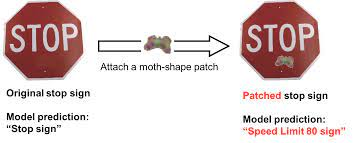

# Name and ID

Student Name: `Mohammad Taslimi`

Student ID: `99101321`

# Imports

In [ ]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# loading dataset [5 pts]

In [ ]:
def load_mnist_dataset(batch_size=64, shuffle=True):
    """
    Load the MNIST dataset and create data loaders for training and test sets.

    Parameters:
        batch_size (int): Batch size for the data loaders.
        shuffle (bool): Whether to shuffle the data during training.

    Returns:
        train_loader (torch.utils.data.DataLoader): DataLoader for the training set.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
    """

    # TODO: Implement dataset loading and preprocessing
    # TODO: Create data loaders using torch.utils.data.DataLoader
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

    testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader


# Train model [10 pts]


In [ ]:
class MNITSClassifier(nn.Module):
  def __init__(self):
    super(MNITSClassifier, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, 1)
    self.conv2 = nn.Conv2d(16, 32, 3, 1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(4608, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = self.fc2(x)
    return x




def train(epoch, model, optimizer, trainloader, criterion):

    '''
    This function trains a given model for a specified number of epochs using a provided optimizer and criterion.
    It computes the loss and updates the model parameters accordingly. It also calculates the training accuracy
    and prints the loss and accuracy statistics for each epoch.

    Inputs:
    epoch: The number of epochs for which the model is to be trained.
    model: The model to be trained.
    optimizer: The optimizer used to update the model parameters.
    trainloader: The dataloader providing the training data.
    criterion: The criterion used to calculate the loss.

    Outputs:
    average_loss: The average loss over the training data for the current epoch.
    train_accuracy: The accuracy of the model on the training data for the current epoch.
    '''

    correct = 0
    total = 0
    print(f'Epoch {epoch+1}:-----------------------------------------------------------------')
    model.train()
    running_loss = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Compute loss and update parameters
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Compute train accuracy
        _, predictions = outputs.max(1)
        total += inputs.shape[0]
        correct += predictions.eq(targets).sum().item()



    # Print statistics
    average_loss = running_loss/len(trainloader)
    train_accuracy = 100. * (correct/total)
    print(f'Train Loss: {average_loss}, Train Accuracy: {train_accuracy}%')

    return average_loss, train_accuracy



def test (net, loader):
  net.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = net(inputs)
      _, preds = outputs.max(1)

      total += inputs.shape[0]
      correct += preds.eq(labels).sum().item()

    return correct/total*100

In [ ]:
def train_model(train_loader, test_loader, num_epochs=5, learning_rate=0.001):
    """
    Train a neural network model on the MNIST dataset.

    Parameters:
        train_loader (torch.utils.data.DataLoader): DataLoader for the training set.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
        num_epochs (int): Number of epochs for training.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model (torch.nn.Module): Trained neural network model.
    """
    # TODO: Implement model architecture
    # Hint: Define a simple neural network architecture using torch.nn.Sequential
    model = MNITSClassifier()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # TODO: Define loss function (criterion) and optimizer
    criterion = torch.nn.CrossEntropyLoss()

    # TODO: Training loop
    for epoch in range(num_epochs):
        train(epoch, model, optimizer, train_loader, criterion)
        print(f'Test accuracy at epoch {epoch+1}: {test(model, test_loader)}\n')

    return model


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 128
train_loader, test_loader = load_mnist_dataset(batch_size=batch_size)
model = train_model(train_loader, test_loader)

In [ ]:
# torch.save(model, 'model.pth')

# Load the model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load('model.pth')
model.to(device)
model.eval()

MNITSClassifier(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=4608, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

# generate patch [50 pts]

In [43]:
def generate_patch(n, model, train_loader, test_loader, target_class, patch_location='top-left'):
    """
    Generate an n x n pattern to fool the network into predicting a wrong number.


    Note: In the original paper, puting the patch anywhere on the image should fool the model
    Here, its enough to put in in one of the four corners (top-right, top-left, bottom-right, bottom-left)
    In the evaluation, you should evaluate each image four times
    However, if you failed, make the patch fool the model in one of the corners. You will get a good part of the grade


    You can set this number arbitrary (like 5)

    Parameters:
        n (int): Size of the pattern (n x n).
        model: classifier
        train and test loader

    Returns:
        patch (numpy.ndarray): Generated pattern.
    """
    # TODO: Implement pattern generation
    # Hint: Create an n x n array with values that resemble the target number (e.g., 5)

    patch = torch.rand(n, n)
    mod_patch = (0.15 + patch*0.5).detach().requires_grad_()
    optimizer = torch.optim.Adam([mod_patch], lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()
    num_epochs = 25
    image_shape = (28, 28)

    model.eval()

    for epoch in range(num_epochs):
        running_loss = 0
        print(f'Epoch {epoch+1}: ------------------------------------------------------')
        for images, targets in train_loader:

            images, targets = images.to(device), targets.to(device)

            # put the patch into images
            patched_images = images.clone()

            if patch_location == 'top-left':
               patched_images[:, :, :n, :n] = mod_patch

            elif patch_location == 'bottom-right':
               patched_images[:, :, image_shape[0]-n:, image_shape[1]-n:] = mod_patch
            # Update the patch
           # print(f'patch: {patch} \n\n\n')
            optimizer.zero_grad()
            outputs = model(patched_images)
            loss = criterion(outputs, torch.full_like(targets, target_class))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Clamp the data between [0, 1]
            # mod_patch.data.clamp_(0, 1)
        print(f'loss at {epoch+1}:\n {running_loss/len(train_loader)}')
        success_rate = evaluate_attack(model, test_loader, mod_patch, target_class)
        print(f'Success rate at epoch {epoch+1} is {100.*success_rate}%.')



    mod_patch = mod_patch.detach().numpy()
    return mod_patch




# evaluate attach [30 pts]

In [44]:
def evaluate_attack(model, test_loader, patch, target_class):
    """
    Evaluate the success rate of the patch attack on the trained model.

    Parameters:
        model (torch.nn.Module): Trained neural network model.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
        patch (numpy.ndarray): Generated patch.
        target_class (int): Target class to be predicted by the model.

    Returns:
        success_rate (float): Success rate of the patch attack.
    """
    # TODO: Implement evaluation of the patch attack
    # Hint: Apply the patch to the images, forward pass through the model, and count successful attacks
    n = patch.shape[0]
    total = 0
    correct_target = 0
    for images, targets in test_loader:
        images, targets = images.to(device), targets.to(device)

        # put the patch into images
        patched_images = images.clone()
        patched_images[:, :, :n, :n] = patch
        # Test the model with the patch
        outputs = model(patched_images)
        _, predictions = outputs.max(1)
        correct_target += predictions.eq(torch.full_like(targets, target_class)).sum()
        total += images.shape[0]


    success_rate = correct_target/total

    return success_rate


# results [5 pts]

In [42]:
n_values = [5, 7, 9, 11]


In [45]:

# Define a range of values for n

# Initialize an empty list to store fooling ratios
fooling_ratios = []

# Iterate over different values of n
target_class = 1
for n in n_values:
    print(f'Generate patch of size {n}*{n}:##########################################################')
    # Generate the patch for the current value of n
    patch = generate_patch(n, model, train_loader, test_loader, target_class)

    # Evaluate the success rate of the patch attack for the current value of n
    success_rate = evaluate_attack(model, test_loader, torch.tensor(patch), target_class)
    print(f'Success rate with patch of size {n}*{n} is {100.*success_rate}%.')


    # Calculate the fooling ratio (1 - success_rate)
    fooling_ratio = 1 - success_rate

    # Append the fooling ratio to the list
    fooling_ratios.append(fooling_ratio)


Generate patch of size 5*5:##########################################################
Epoch 1: ------------------------------------------------------
loss at 1:
 18.285342541839015
Success rate at epoch 1 is 11.459999084472656%.
Epoch 2: ------------------------------------------------------
loss at 2:
 17.95569769609203
Success rate at epoch 2 is 11.559999465942383%.
Epoch 3: ------------------------------------------------------
loss at 3:
 17.443039001432307
Success rate at epoch 3 is 11.6899995803833%.
Epoch 4: ------------------------------------------------------
loss at 4:
 16.919583241314267
Success rate at epoch 4 is 12.0%.
Epoch 5: ------------------------------------------------------
loss at 5:
 16.373341096743847
Success rate at epoch 5 is 12.339999198913574%.
Epoch 6: ------------------------------------------------------
loss at 6:
 15.784738184800789
Success rate at epoch 6 is 12.989999771118164%.
Epoch 7: ------------------------------------------------------
loss at 7

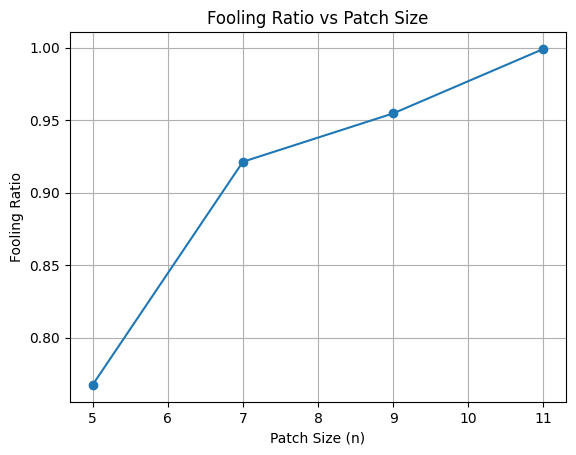

In [50]:

# Plot fooling ratios versus n
plt.plot(n_values, 1 - torch.tensor(fooling_ratios).cpu().numpy(), marker='o')
plt.xlabel('Patch Size (n)')
plt.ylabel('Fooling Ratio')
plt.title('Fooling Ratio vs Patch Size')
plt.grid(True)
plt.show()
